# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 609


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units=metric&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yatou
Processing Record 2 of Set 1 | gerash
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | yellowknife
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | east london
Processing Record 7 of Set 1 | tiksi
Processing Record 8 of Set 1 | zhangjiajie
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | amherst
Processing Record 11 of Set 1 | santana
Processing Record 12 of Set 1 | blackmans bay
Processing Record 13 of Set 1 | puerto ayora
Processing Record 14 of Set 1 | auki
Processing Record 15 of Set 1 | sao vicente
Processing Record 16 of Set 1 | nykvarn
Processing Record 17 of Set 1 | kodiak
Processing Record 18 of Set 1 | choyr
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | karatuzskoye
Processing Record 21 of Set 1 | san patricio
Processing Record 22 of Set 1 | bethel
Processing Record 23 of Set 1 | c

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          585
Lat           585
Lng           585
Max Temp      585
Humidity      585
Cloudiness    585
Wind Speed    585
Country       585
Date          585
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,yatou,37.1500,122.3833,25.34,90,100,1.32,CN,1723059457
1,gerash,27.6652,54.1371,35.08,49,100,2.45,IR,1723059458
2,port-aux-francais,-49.3500,70.2167,0.99,98,100,12.28,TF,1723059460
3,yellowknife,62.4560,-114.3525,21.34,48,75,6.71,CA,1723059461
4,grytviken,-54.2811,-36.5092,-5.67,72,19,4.50,GS,1723059389


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [50]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Change column names for clarity, also to help plot titles later
city_data_df.rename(columns={'Lat': 'Latitude', 'Lng': 'Longitude'}, inplace=True)

# Display sample data
city_data_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yatou,37.1500,122.3833,25.34,90,100,1.32,CN,1723059457
1,gerash,27.6652,54.1371,35.08,49,100,2.45,IR,1723059458
2,port-aux-francais,-49.3500,70.2167,0.99,98,100,12.28,TF,1723059460
3,yellowknife,62.4560,-114.3525,21.34,48,75,6.71,CA,1723059461
4,grytviken,-54.2811,-36.5092,-5.67,72,19,4.50,GS,1723059389


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

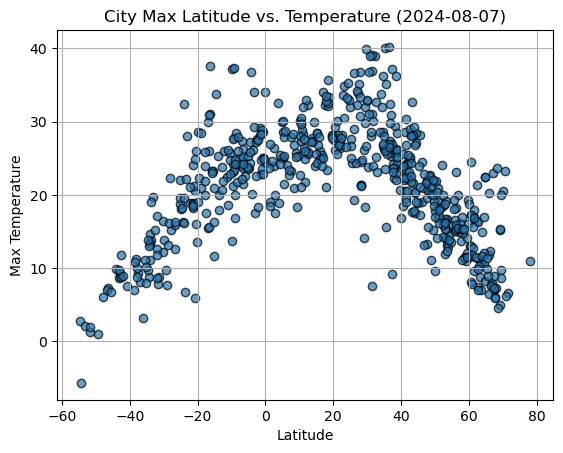

In [25]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values, y_values, edgecolors='black', alpha=.7)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Latitude vs. Max Temperature (2024-08-07)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

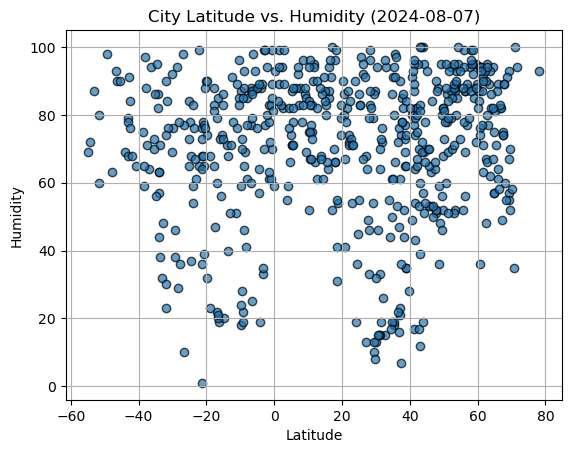

In [26]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values, y_values, edgecolors='black', alpha=.7)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (2024-08-07)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

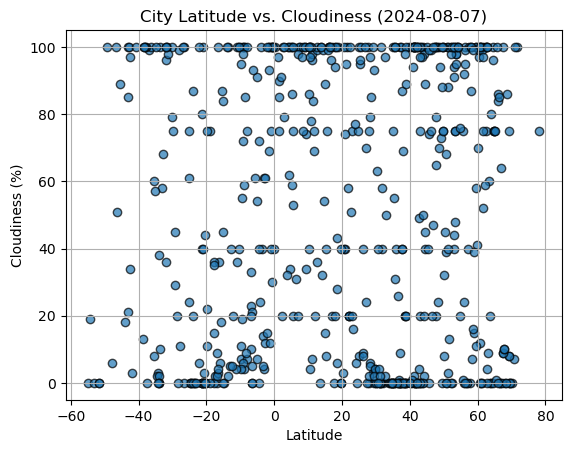

In [27]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values, y_values, edgecolors='black', alpha=.7)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (2024-08-07)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

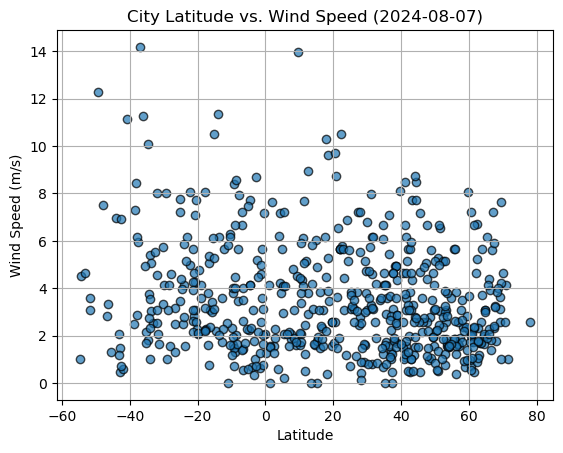

In [28]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values, y_values, edgecolors='black', alpha=.7)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs. Wind Speed (2024-08-07)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [116]:
# Define a function to create Linear Regression plots
def regress_func(city_data_df, x_col, y_col):
   
    # Use scipy.stats lingress
    (slope, intercept, rvalue, pvalue, stderr) = linregress(city_data_df[x_col], city_data_df[y_col])

    # Get linear regression values
    linreg_values = city_data_df[x_col] * slope + intercept
    line_eq = f"y={round(slope,2)}x + {round(intercept,2)}"
    
    # Plotting the results
    # References: stackoverflow (1)
    plt.scatter(city_data_df[x_col], city_data_df[y_col], alpha=.7)
    plt.plot(city_data_df[x_col], linreg_values, color='red')
    plt.annotate(line_eq, xy=(.06,.05), xycoords='axes fraction', fontsize=15, color='red')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f"{x_col} v. {y_col}")
    print(f"The r^2-value is: {rvalue**2}")
    plt.show()

    # Return the following:
    return slope, intercept, rvalue, pvalue, stderr, linreg_values



In [117]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Latitude'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yatou,37.1500,122.3833,25.34,90,100,1.32,CN,1723059457
1,gerash,27.6652,54.1371,35.08,49,100,2.45,IR,1723059458
3,yellowknife,62.4560,-114.3525,21.34,48,75,6.71,CA,1723059461
6,tiksi,71.6872,128.8694,6.66,94,100,0.99,RU,1723059464
7,zhangjiajie,29.1294,110.4783,26.15,79,3,0.87,CN,1723059465


In [118]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Latitude'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,port-aux-francais,-49.3500,70.2167,0.99,98,100,12.28,TF,1723059460
4,grytviken,-54.2811,-36.5092,-5.67,72,19,4.50,GS,1723059389
5,east london,-33.0153,27.9116,19.74,32,58,2.51,ZA,1723059463
8,ushuaia,-54.8000,-68.3000,2.79,69,0,1.03,AR,1723059307
10,santana,-0.0583,-51.1817,34.10,59,40,2.06,BR,1723059469


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.4509070011407908


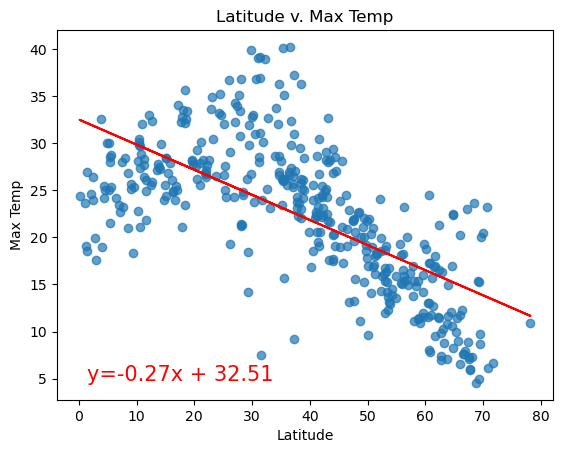

In [119]:
# Linear regression on Northern Hemisphere
temp_north = regress_func(northern_hemi_df, 'Latitude', 'Max Temp')


#### Latitude Vs. Cloudiness

The r^2-value is: 0.6735350321720743


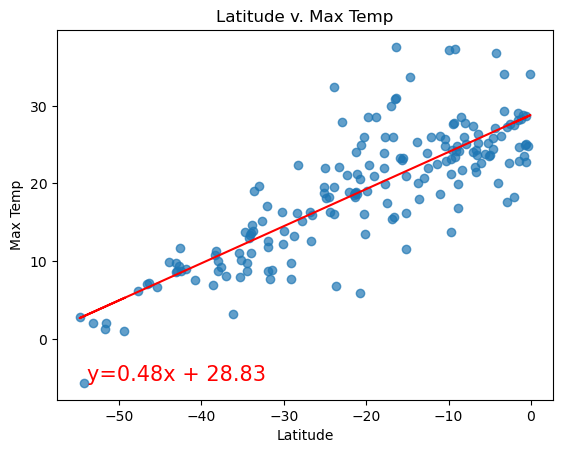

In [120]:
# Linear regression on Southern Hemisphere
temp_south = regress_func(southern_hemi_df, 'Latitude', 'Max Temp')

**Discussion about the linear relationship:** The northern hemisphere plot showed a clear negative correlation between latitude and temperature, whereas the southern hemisphere plot showed a positive correlation. As both approach the equator the temperature tends to increase.

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.0005627519393294724


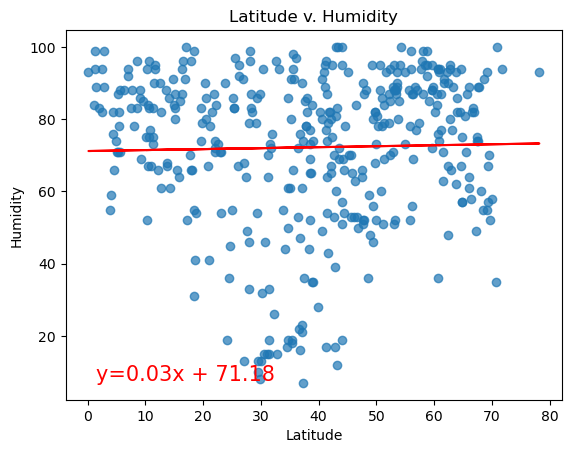

In [129]:
# Northern Hemisphere
humid_north= regress_func(northern_hemi_df, 'Latitude', 'Humidity')


The r^2-value is: 0.0008303442654596483


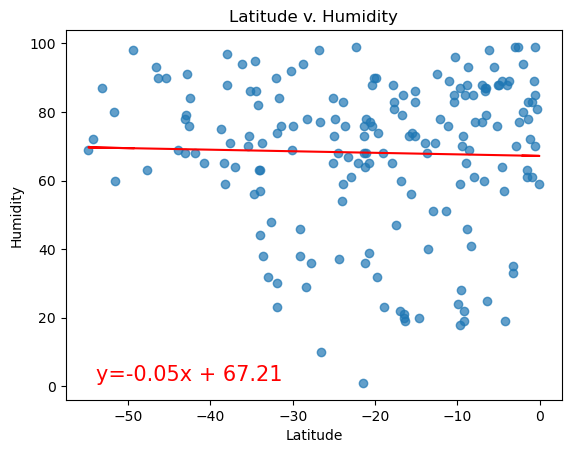

In [122]:
# Southern Hemisphere
humid_south = regress_func(southern_hemi_df, 'Latitude', 'Humidity')

**Discussion about the linear relationship:** The linear regression for these humidity and latitude plots are not very informative. There is no clear correlation between these two factors.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.010565247518945204


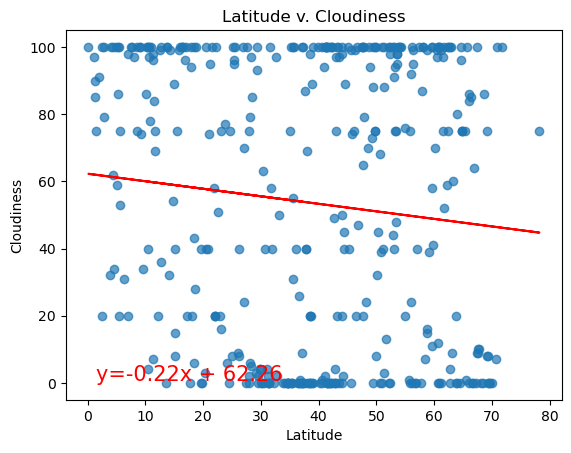

In [123]:
# Northern Hemisphere
cloud_north = regress_func(northern_hemi_df, 'Latitude', 'Cloudiness')

The r^2-value is: 2.924822831406711e-07


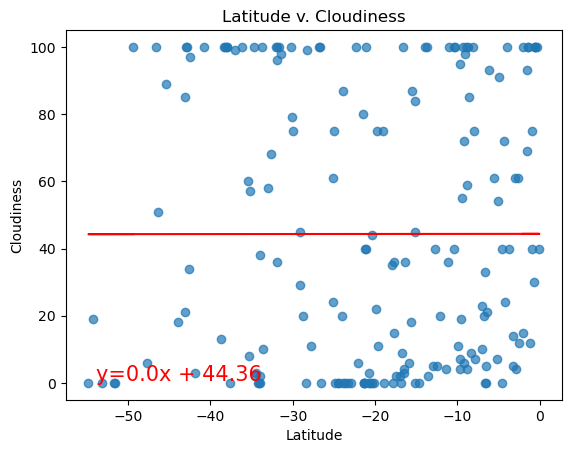

In [124]:
# Southern Hemisphere
could_south = regress_func(southern_hemi_df, 'Latitude', 'Cloudiness')

**Discussion about the linear relationship:** The linear regression for these cloudiness and latitude plots are not very informative. There is no clear correlation between these two factors.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.014445642882249681


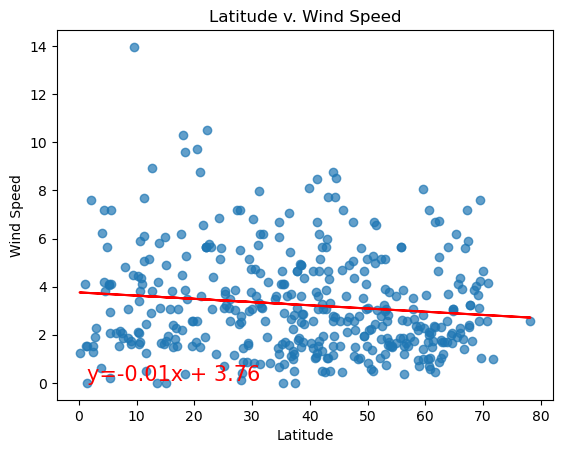

In [125]:
# Northern Hemisphere
wind_north = regress_func(northern_hemi_df, 'Latitude', 'Wind Speed')

The r^2-value is: 0.020108936261797213


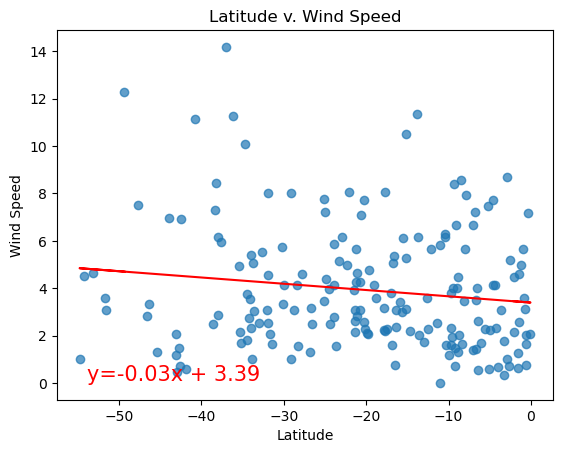

In [126]:
# Southern Hemisphere
wind_south = regress_func(southern_hemi_df, 'Latitude', 'Wind Speed')

**Discussion about the linear relationship:** The linear regression for these wind speed and latitude plots are not very informative. There is no clear correlation between these two factors. The only clear correlations here are between latitude and temperature. Cloudiness, humidity and wind speed have relatively flat linear relationships to latitude, no clear correlation.